In [190]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [191]:
data_path = "./dataset/spotify_songs.csv"
data = pd.read_csv(data_path)

In [192]:
data.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [193]:
data["track_album_release_date"] = pd.to_datetime(data["track_album_release_date"])
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

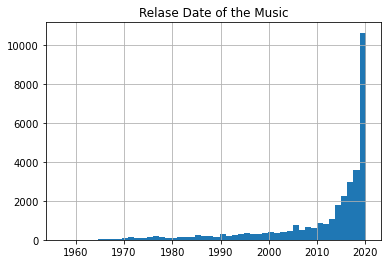

In [194]:
data["track_album_release_date"].hist(bins=50)
plt.title("Relase Date of the Music")
plt.show()

In [195]:
data_country = data.groupby('playlist_subgenre').size()
data_country.head()

playlist_subgenre
album rock       1065
big room         1206
classic rock     1296
dance pop        1298
electro house    1511
dtype: int64

### Test de la popularité actuelle des musiques en fonction de la date de sortie originelle de l'album

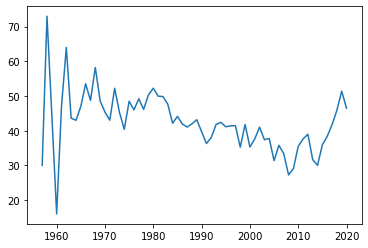

In [196]:
data_year = data.groupby(data['track_album_release_date'].dt.year)["track_popularity"].mean()
data_year = data_year.reset_index()

plt.plot(data_year["track_album_release_date"], data_year["track_popularity"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201D2130F70>]],
      dtype=object)

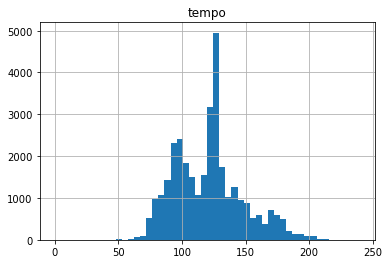

In [197]:
data.hist(column="tempo", bins=50)

In [198]:
data_tempo = data.groupby("tempo")["energy"].mean()
data_tempo = data_tempo.reset_index()
print(data_tempo.head())
# plt.bar(data_tempo["tempo"], data_tempo["energy"])

    tempo  energy
0   0.000  0.3150
1  35.477  0.1960
2  37.114  0.2520
3  38.985  0.3360
4  46.169  0.0658


In [199]:
bins = np.linspace(0,1,21) # Intervalles
bins
avg_arr = ((bins + np.roll(bins, -1))/2.0)[:-1] # Milieu des intervalles
avg_arr

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

    tempo  energy energy_range
0   0.000  0.3150  (0.3, 0.35]
1  35.477  0.1960  (0.15, 0.2]
2  37.114  0.2520  (0.25, 0.3]
3  38.985  0.3360  (0.3, 0.35]
4  46.169  0.0658  (0.05, 0.1]


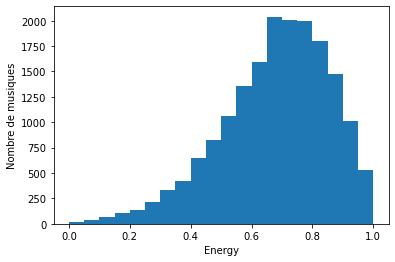

In [200]:
data_tempo['energy_range'] = pd.cut(data_tempo['energy'], bins)
print(data_tempo.head())
# Grouping by tempo range
test = data_tempo.groupby('energy_range')["tempo"].mean()
test = test.reset_index()

plt.hist(data_tempo['energy'], bins=bins)
plt.xlabel('Energy')
plt.ylabel('Nombre de musiques')
plt.show()

In [201]:
test.head()

,energy_range,tempo
0,"(0.0, 0.05]",115.392385
1,"(0.05, 0.1]",114.501952
2,"(0.1, 0.15]",109.066232
3,"(0.15, 0.2]",113.170009
4,"(0.2, 0.25]",113.715139


Text(0, 0.5, 'Tempo moyen')

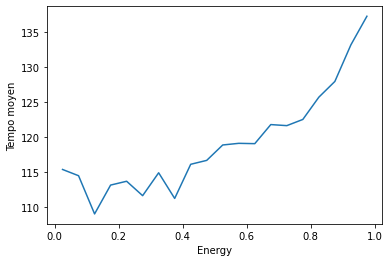

In [202]:
plt.plot(avg_arr,test['tempo'])
plt.xlabel('Energy')
plt.ylabel('Tempo moyen')

# Loudness

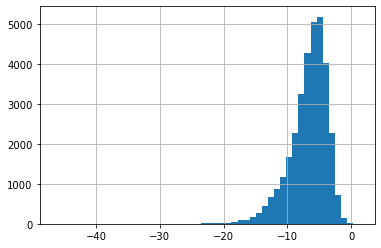

In [203]:
data["loudness"].hist(bins=50)

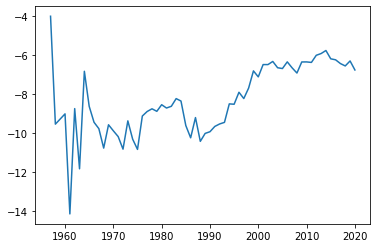

In [206]:
data_loudness = data.groupby(data['track_album_release_date'].dt.year)["loudness"].mean()
data_loudness = data_loudness.reset_index()

plt.plot(data_loudness["track_album_release_date"], data_loudness["loudness"])